Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.



C:\Users\13126\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'A' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\13126\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'd' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\13126\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'm' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#using-proxy-artist
  "#using-proxy-artist".format(orig_handle)
C:\Users\13126\Anaconda3\lib\site-packages\matplotlib\legend.py:633: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/use

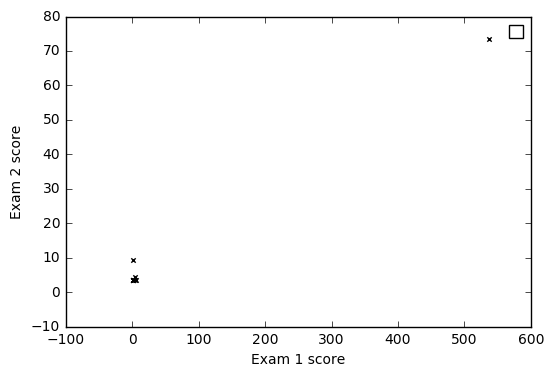


Program paused. Press enter to continue.

2


C:\Users\13126\Anaconda3\lib\site-packages\ipykernel\__main__.py:32: RuntimeWarning: divide by zero encountered in log


Cost at initial theta (zeros): 0.693147

Expected cost (approx): 0.693

Gradient at initial theta (zeros): 

[[ -0.5       ]
 [-25.48852273]
 [ -5.18368365]]

Expected gradients (approx):
 -0.1000
 -12.0092
 -11.2628


Cost at test theta: nan

Expected cost (approx): 0.218

Gradient at test theta: 

[[-0.90909091]
 [-2.20227273]
 [-3.69760664]]

Expected gradients (approx):
 0.043
 2.566
 2.647


Program paused. Press enter to continue.


Cost at theta found by fminunc: 0.000007

Expected cost (approx): 0.203

theta: 

[ 1.1643673  -0.49749405  3.76022121]

Expected theta (approx):

 -25.161
 0.206
 0.201

For a student with scores 45 and 85, we predict an admission probability of 1.000000

Expected value: 0.775 +/- 0.002


Train Accuracy: 100.0

Expected accuracy (approx): 89.0





In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def plotData(X,y):
    """
    Plot the data points with + for the positive examples
    and o for the negative examples. X is assumed to be a Mx2 matrix.
    """

    # Find Indices of Positive and Negative Examples
    pos = [i for i in range(len(y)) if y[i]==1]
    neg = [i for i in range(len(y)) if y[i]==0]
    # Plot Examples
    plt.scatter(X[pos,0],X[pos,1],s=10,c='k',marker='x')
    plt.scatter(X[neg,0],X[neg,1],s=7,c='k',marker='o')
    plt.xlabel('Exam 1 score')
    plt.ylabel('Exam 2 score')
    plt.legend('Admitted','Not Admitted')
    plt.show()

def sigmoid(z):
    'computes the sigmoid of z'

    return 1 / (1 + np.exp(-z))

def costFunction(theta,X,y):
    'Compute cost for logistic regression'

    m = len(y) # number of training examples    
    h_x = sigmoid(np.dot(X,theta))
    J = -1/m * (np.dot(y.T, np.log(h_x)) + np.dot((1-y).T, np.log(1 - h_x)))


    return J

def gradient(theta,X,y):
    'Compute gradient for logistic regression'

    m = len(y) # number of training examples    
    h_x = sigmoid(np.dot(X,theta))
    grad = 1/m * np.dot(X.T, (h_x - y))

    return grad

def predict(theta, X):
    'Computes the predictions for X using a threshold at 0.5'

    m = X.shape[0]
    # Initialize p
    p = np.zeros((m,1))

    h_x = sigmoid(np.dot(X,theta))
    for i in range(m):
        if h_x[i] >= 0.5:
            p[i] = 1
        else:
            p[i] = 0

    return p


if __name__ == '__main__':

    ## Load Data
    #  The first two columns contains the exam scores and the third column
    #  contains the label.

    data = []

    with open('./ex2data1.txt','r') as infile:
        for line in infile:
            line = line.split(',')
            data.append([float(line[0]),float(line[1]),float(line[2])])
    data = np.array(data)
    X = data[:,[0,1]]
    y = data[:,2]

    #%% ==================== Part 1: Plotting ====================
    #  We start the exercise by first plotting the data to understand the 
    #  the problem we are working with.

    print('Plotting data with + indicating (y = 1) examples and o ' \
             'indicating (y = 0) examples.\n')

    plotData(X, y)

    print('\nProgram paused. Press enter to continue.\n')
    input()


    #%% ============ Part 2: Compute Cost and Gradient ============
    #  Setup the data matrix appropriately, and add ones for the intercept term
    [m, n] = X.shape
    y = y.reshape(m,1)

    # Add intercept term to x and X_test
    X = np.hstack((np.ones((m, 1)),X))

    # Initialize fitting parameters
    initial_theta = np.zeros((n + 1, 1))

    # Compute and display initial cost and gradient
    cost = costFunction(initial_theta, X, y)
    grad = gradient(initial_theta,X,y)

    print('Cost at initial theta (zeros): %f\n'% cost)
    print('Expected cost (approx): 0.693\n')
    print('Gradient at initial theta (zeros): \n')
    print('{}\n'.format(grad))
    print('Expected gradients (approx):\n -0.1000\n -12.0092\n -11.2628\n')

    # Compute and display cost and gradient with non-zero theta
    test_theta = np.array([[-24], [0.2], [0.2]])
    cost = costFunction(test_theta, X, y)
    grad = gradient(test_theta, X, y)

    print('\nCost at test theta: %f\n'% cost)
    print('Expected cost (approx): 0.218\n')
    print('Gradient at test theta: \n')
    print('{}\n'.format(grad))
    print('Expected gradients (approx):\n 0.043\n 2.566\n 2.647\n')

    print('\nProgram paused. Press enter to continue.\n')
    input()


    #%% ============= Part 3: Optimizing using scipy.optimize.minimize  =============

    #  Run minimize to obtain the optimal theta
    #  This function will return theta and the cost 
    res = minimize(fun=costFunction, x0 = initial_theta,  
                             args = (X,y), method = 'SLSQP', 
                             options = {'maxiter': 400})
    cost = res.fun
    theta = res.x

    print('Cost at theta found by fminunc: %f\n'% cost)
    print('Expected cost (approx): 0.203\n')
    print('theta: \n')
    print('{}\n'.format(theta))
    print('Expected theta (approx):\n')
    print(' -25.161\n 0.206\n 0.201\n')

    # Plot Boundary
    #plotDecisionBoundary(theta, X, y)


    #%% ============== Part 4: Predict and Accuracies ==============
    #  1. Predict the probability that a student with score 45 on exam 1 and 
    #  score 85 on exam 2 will be admitted.
    #  2. Compute the training and test set accuracies of our model.


    prob = sigmoid(np.dot(np.array([1, 45, 85]), theta))
    print('For a student with scores 45 and 85, we predict an admission '\
             'probability of %f\n'% prob)
    print('Expected value: 0.775 +/- 0.002\n\n')

    # Compute accuracy on our training set
    p = predict(theta, X)

    print('Train Accuracy: {}\n'.format(p[p==y].size/m * 100))
    print('Expected accuracy (approx): 89.0\n')
    print('\n')